Download Flux tower data from Google Drive folder **ATMOS Flux Data/MMDDYYY/YYYY/MM** (email spal@anl.gov for access of the data)

In [16]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import time
from datetime import timedelta, date
import os
import glob
import requests
import wget

In [17]:
# Put the downloaded data in /lcrc/project/CONUS_Hydro/CROCUS/ATMOS/flux_data/
folder_path = '/lcrc/project/CONUS_Hydro/CROCUS/ATMOS/flux_data/'
months = ['05','06','07','08','09']
folders = []
for month in months:
    folders.append(sorted(glob.glob(folder_path + month +'/*')))
#store all the folders into one list
all_folders = [j for i in folders for j in i]

In [18]:
# Read all the flux data from the .csv files generated by smartflux
fluxdata = []
for folder in all_folders:
    try: 
        file = glob.glob(folder+'/output/eddypro_exp_full_output*')
        df = pd.read_csv(file[0],header=None, skiprows = 3)
        fluxdata.append(df)
        del df,file
    except:
        print("skip") # some folders have .tmp files and not csv, ignore those

skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip


In [19]:
# add the column names to the data frame from any random single file
all_data = pd.concat(fluxdata, axis=0)
folder = all_folders[100] # 100 is random here
onefile = glob.glob(folder+'/output/eddypro_exp_full_output*')
line = pd.read_csv(onefile[0],header=1)
all_data.columns = line.columns

In [20]:
# keeping only the data needed to plot fluxes
data = all_data[["date","time","ET","LE","H","co2_flux","h2o_flux","ch4_flux","air_temperature","air_pressure","specific_humidity","RH","VPD","Tdew","wind_speed","wind_dir","bowen_ratio"]]

In [21]:
# Calculate hourly and daily values from half-hourly
data['Datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data = data.set_index('Datetime')
data = data.drop(['date','time'], axis=1)
data_hourly = data.resample('H').mean()
data_daily = data.resample('D').mean()

/home/spal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Clean up data for calculations and plotting
# set unrealistic data to NaN
data_hourly.LE[data_hourly.LE<=-200] = np.NaN
data_hourly.LE[data_hourly.LE>= 600] = np.NaN
data_hourly.co2_flux[data_hourly.co2_flux<=-100] = np.NaN
data_hourly.co2_flux[data_hourly.co2_flux>= 100] = np.NaN
#data_hourly.ch4_flux[data_hourly.ch4_flux<=-100] = np.NaN
data_hourly.ch4_flux[data_hourly.ch4_flux>= 0.2] = np.NaN

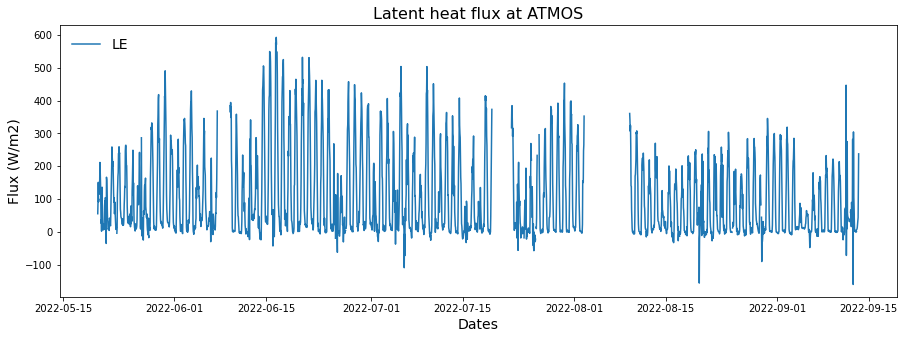

In [23]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data_hourly.index,data_hourly['LE'], label = 'LE')
ax.set_xlabel('Dates', fontsize =14)

ax.set_ylabel('Flux (W/m2)', color='black', fontsize =14)
ax.set_title('Latent heat flux at ATMOS', fontsize =16)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
plt.savefig('LHflux_ATMOS.png', dpi=300)

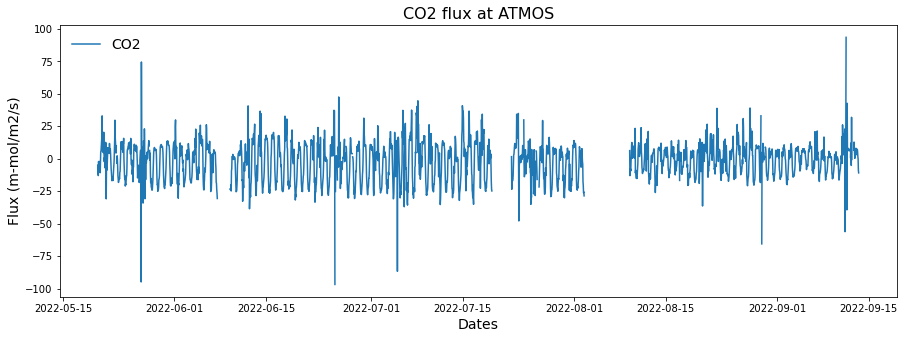

In [24]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data_hourly.index,data_hourly['co2_flux'], label = 'CO2')
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Flux (m-mol/m2/s)', color='black', fontsize =14)
ax.set_title('CO2 flux at ATMOS', fontsize =16)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
plt.savefig('CO2flux_ATMOS.png', dpi=300)

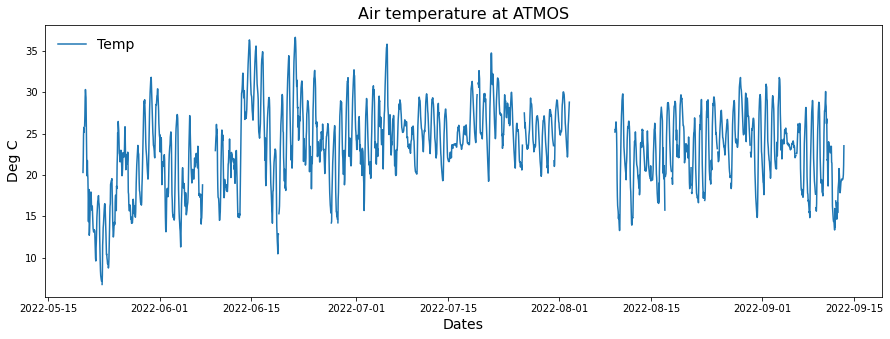

In [25]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data_hourly.index,data_hourly['air_temperature']-273.15, label = 'Temp')
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Deg C', color='black', fontsize =14)
ax.set_title('Air temperature at ATMOS', fontsize =16)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
plt.savefig('Temp_ATMOS.png', dpi=300)

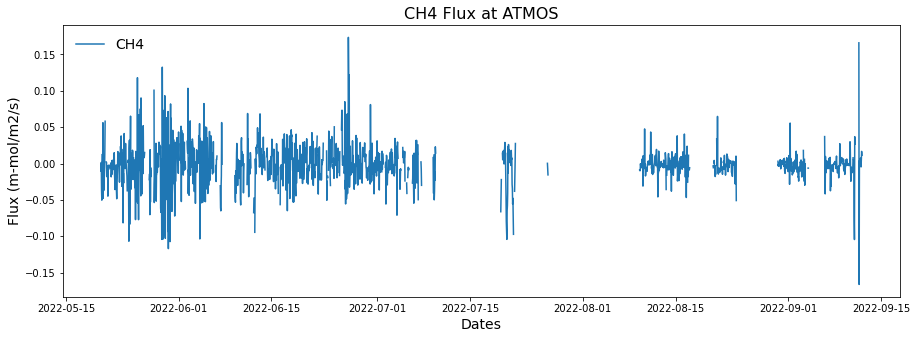

In [26]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data_hourly.index,data_hourly['ch4_flux'], label = 'CH4')
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Flux (m-mol/m2/s)', color='black', fontsize =14)
ax.set_title('CH4 Flux at ATMOS', fontsize =16)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
plt.savefig('CH4flux_ATMOS.png', dpi=300)